In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing public unemployment data
unemployment_df = pd.read_excel('https://www.ers.usda.gov/webdocs/DataFiles/48747/Unemployment.xls?v=0', header = 7)

unemployment_df = unemployment_df.dropna()

In [3]:
unemployment_df.head()

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,21720.0,20846.0,874.0,4.0,...,26196.0,25261.0,935.0,3.6,26172.0,25458.0,714.0,2.7,59338.0,118.959123
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,69533.0,66971.0,2562.0,3.7,...,95233.0,91809.0,3424.0,3.6,97328.0,94675.0,2653.0,2.7,57588.0,115.450773
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,11373.0,10748.0,625.0,5.5,...,8414.0,7987.0,427.0,5.1,8537.0,8213.0,324.0,3.8,34382.0,68.928049
5,1007,AL,"Bibb County, AL",1.0,1.0,1.0,8565.0,8111.0,454.0,5.3,...,8605.0,8268.0,337.0,3.9,8685.0,8419.0,266.0,3.1,46064.0,92.347788
6,1009,AL,"Blount County, AL",1.0,1.0,1.0,25106.0,24231.0,875.0,3.5,...,25069.0,24201.0,868.0,3.5,25331.0,24655.0,676.0,2.7,50412.0,101.064534


In [4]:
#subsetting dataset
unemployment_df = unemployment_df[['Stabr','area_name','Unemployment_rate_2007','Unemployment_rate_2008','Unemployment_rate_2009',
       'Unemployment_rate_2010','Unemployment_rate_2011','Unemployment_rate_2012','Unemployment_rate_2013',
       'Unemployment_rate_2014','Unemployment_rate_2015','Unemployment_rate_2016','Unemployment_rate_2017']]

In [5]:
#renaming columns
unemployment_df.columns=['State','County','2007','2008','2009',
       '2010','2011','2012','2013',
       '2014','2015','2016','2017']

In [6]:
unemployment_df.head()

,State,County,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,AL,"Autauga County, AL",3.3,5.1,9.7,8.9,8.4,6.9,6.2,5.8,5.2,5.1,3.9
3,AL,"Baldwin County, AL",3.1,4.6,9.8,10.0,9.0,7.5,6.6,6.1,5.5,5.3,4.1
4,AL,"Barbour County, AL",6.3,8.8,14.3,12.3,11.5,11.5,10.2,10.5,8.9,8.3,5.8
5,AL,"Bibb County, AL",4.1,5.8,13.3,11.4,10.5,8.5,7.9,7.2,6.6,6.4,4.4
6,AL,"Blount County, AL",3.2,4.7,10.0,9.8,8.7,6.9,6.3,6.1,5.4,5.4,4.0


In [7]:
#getting data at state level
df_state = unemployment_df.groupby('State', axis=0).sum()
#getting totals by state
df_state['St_Total']=df_state.sum(axis=1)
df_state.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,St_Total
State,,,,,,,,,,,,
AK,191.9,200.6,222.8,246.6,251.8,249.1,248.9,242.5,221.7,220.1,212.2,2508.2
AL,328.3,467.4,882.5,827.4,751.5,620.0,569.0,529.0,470.9,446.1,338.4,6230.5
AR,453.7,465.5,649.2,680.1,696.1,638.2,613.5,513.2,432.7,345.6,318.2,5806.0
AZ,81.5,121.7,194.0,195.8,183.5,168.3,161.0,141.8,130.9,114.6,100.9,1594.0
CA,393.5,501.0,719.1,800.8,779.1,704.3,603.7,511.5,436.5,401.9,350.4,6201.8


In [8]:
#df by years
df_years=df_state.transpose()
df_years['Yr_Total']=df_years.sum(axis=1)
df_years.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,Yr_Total
2007,191.9,328.3,453.7,81.5,393.5,228.4,35.0,5.5,10.3,280.5,...,522.0,1069.6,86.0,494.5,61.4,237.8,387.8,282.6,67.2,15263.0
2008,200.6,467.4,465.5,121.7,501.0,294.7,44.3,6.5,14.9,433.7,...,745.3,1157.1,115.8,637.2,70.9,258.4,389.7,270.3,72.4,18222.1
2009,222.8,882.5,649.2,194.0,719.1,415.6,61.9,9.3,24.6,675.3,...,1188.1,1853.2,225.9,1064.6,99.6,388.5,659.6,484.1,145.1,28354.1
2010,246.6,827.4,680.1,195.8,800.8,549.7,71.4,9.4,25.7,732.2,...,1074.3,2024.8,245.8,1127.4,94.8,419.0,676.0,535.7,141.7,29322.8
2011,251.8,751.5,696.1,183.5,779.1,528.2,68.9,10.2,23.2,679.2,...,992.9,1904.9,218.4,1030.3,85.6,403.1,609.4,494.2,129.3,27302.1


In [9]:
#downloading tips df
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Scatter Plots

<Figure size 1440x720 with 0 Axes>

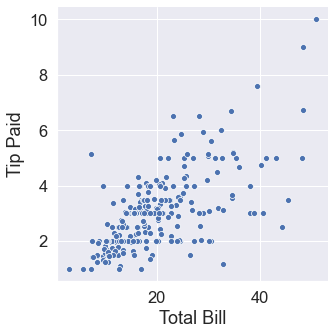

In [10]:
# tips vs bill for all data
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
ax=sns.relplot(kind='scatter',x="total_bill", y="tip", data=tips_df)
ax.set(xlabel='Total Bill', ylabel='Tip Paid')
#ax.set_title('Bills vs Tips')

<Figure size 1080x720 with 0 Axes>

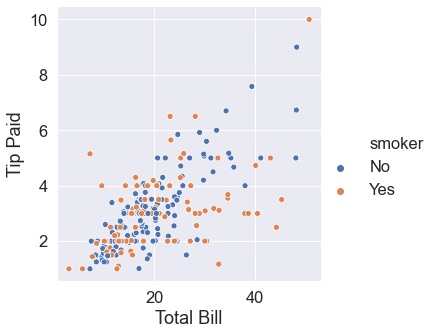

In [11]:
#tips vs bill split by categorical variables, hue represents legends
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
ax=sns.relplot(kind='scatter', x="total_bill", y="tip", hue="smoker", data=tips_df)
ax.set(xlabel='Total Bill', ylabel='Tip Paid')


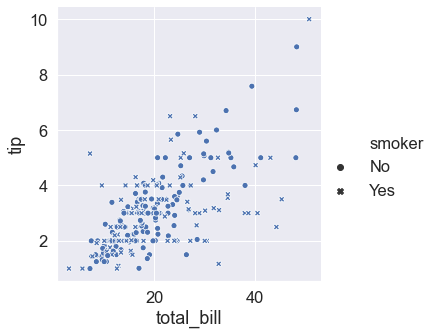

In [12]:
#different marker shapes
sns.relplot(kind='scatter',x="total_bill", y="tip", style="smoker",data=tips_df)

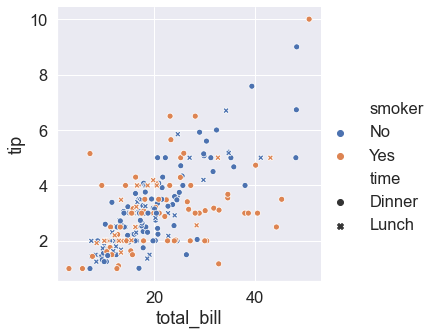

In [13]:
#shapes and color for splitting by two variables
sns.relplot(kind='scatter',x="total_bill", y="tip", hue="smoker", style="time", data=tips_df)

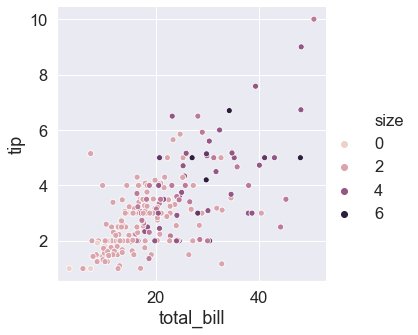

In [14]:
#hue for numerical variables
sns.relplot(kind='scatter',x="total_bill", y="tip", hue="size", data=tips_df)


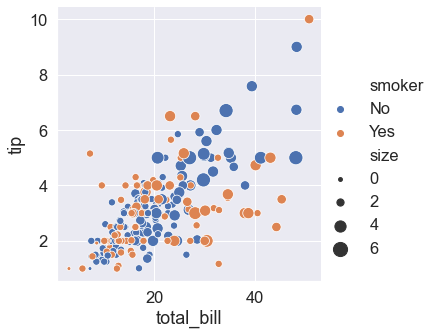

In [15]:
#splitting by size and smokers
sns.relplot(kind='scatter',x="total_bill", y="tip",hue="smoker", size="size",sizes=(15, 200), data=tips_df)


## Line Plot

In [16]:
years = list(map(str, range(2007, 2018)))
south_df=df_state.loc[['TX','AR','LA','TN','FL'], years].transpose()
south_df.head()

State,TX,AR,LA,TN,FL
2007,1069.6,453.7,292.1,522.0,280.5
2008,1157.1,465.5,331.1,745.3,433.7
2009,1853.2,649.2,468.2,1188.1,675.3
2010,2024.8,680.1,525.8,1074.3,732.2
2011,1904.9,696.1,517.0,992.9,679.2


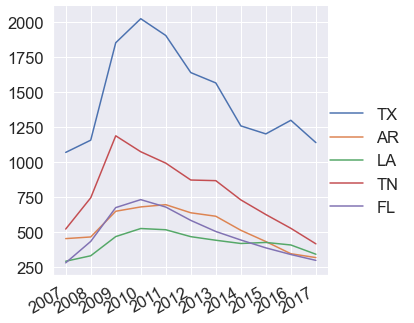

In [17]:
g = sns.relplot(kind="line", data=south_df,dashes=False)
g.fig.autofmt_xdate()

## Bar Plots

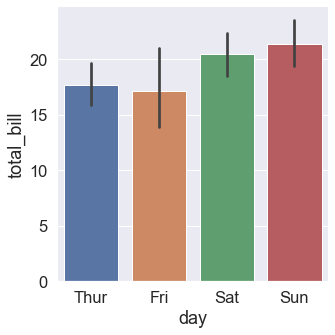

In [18]:
ax = sns.catplot(x="day", y="total_bill",kind='bar', data=tips_df)

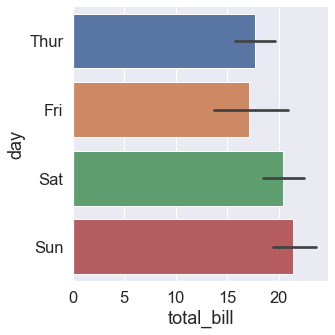

In [19]:
#horizontal bars, switching x and y values
ax = sns.catplot(x="total_bill", y="day",kind='bar',data=tips_df)

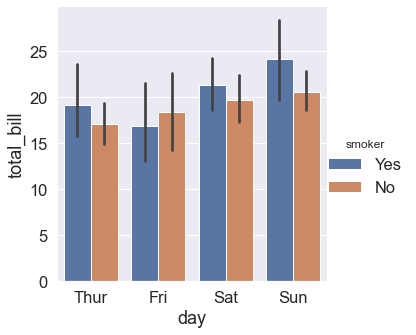

In [20]:
#breaking by smokers
ax = sns.catplot(x="day", y="total_bill", hue="smoker", kind='bar',data=tips_df)

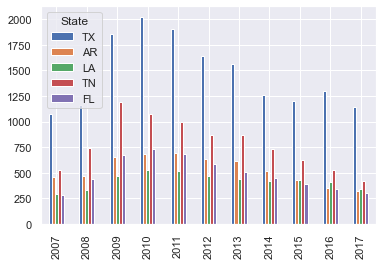

In [21]:
#unstacked graph for timeseries graph
sns.set()
south_df.plot(kind='bar')

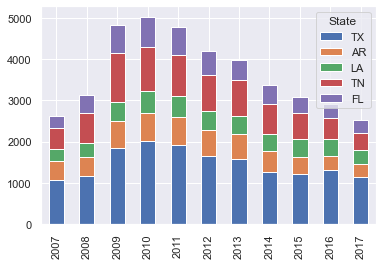

In [22]:
#stacking for timeseries graph
sns.set()
south_df.plot(kind='bar', stacked=True)

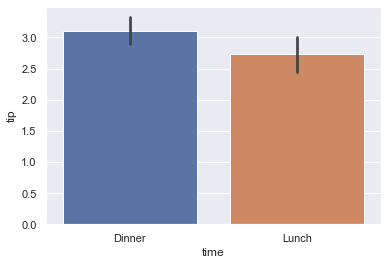

In [23]:
#ordering the bars
ax = sns.barplot(x="time", y="tip", data=tips_df,
                 order=["Dinner", "Lunch"])

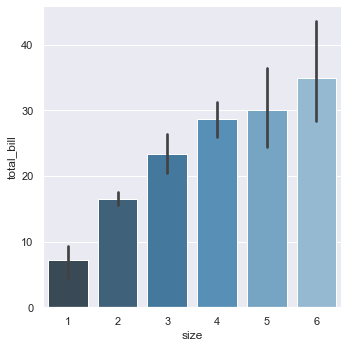

In [24]:
ax = sns.catplot(x="size", y="total_bill", data=tips_df, kind='bar',
                 palette="Blues_d")

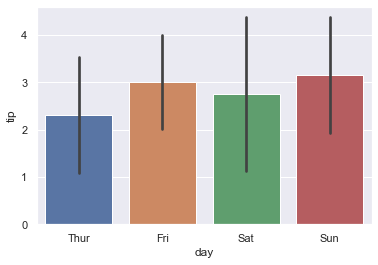

In [25]:
from numpy import median
ax = sns.barplot(x="day", y="tip", data=tips_df, estimator=median,ci="sd")

## Box Plots

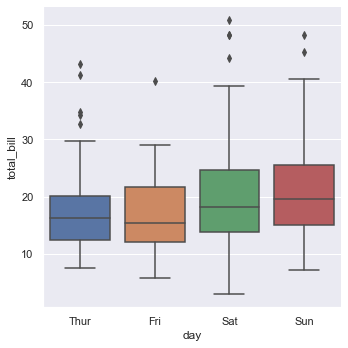

In [26]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips_df)

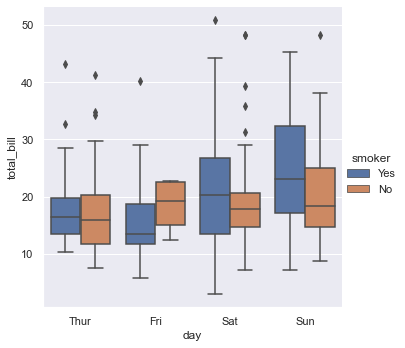

In [27]:
#splitting by smokers
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips_df)

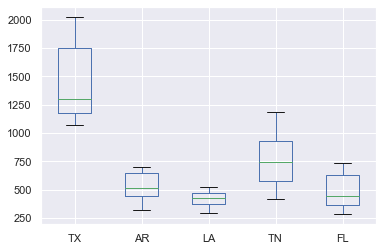

In [28]:
sns.set()
south_df.plot(kind='box')

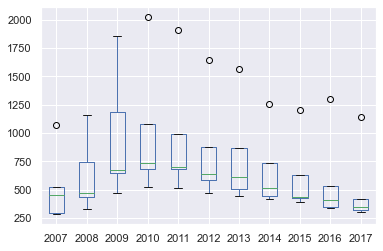

In [29]:
sns.set()
south_df.T.plot(kind='box')

## Violin Plot

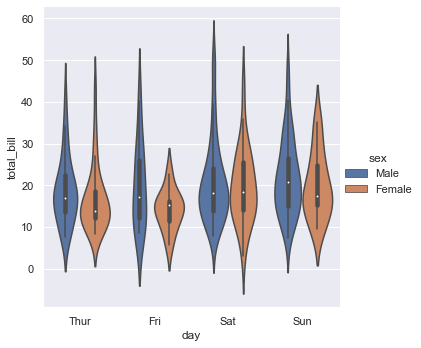

In [30]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=False, data=tips_df);

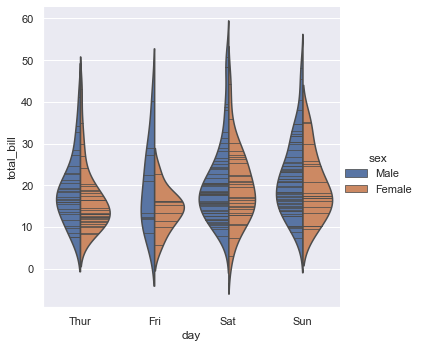

In [31]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, inner="stick",data=tips_df);

## Regression Plot

In [32]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(unemployment_df[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,2007,15263.0
1,2008,18222.1
2,2009,28354.1
3,2010,29322.8
4,2011,27302.1


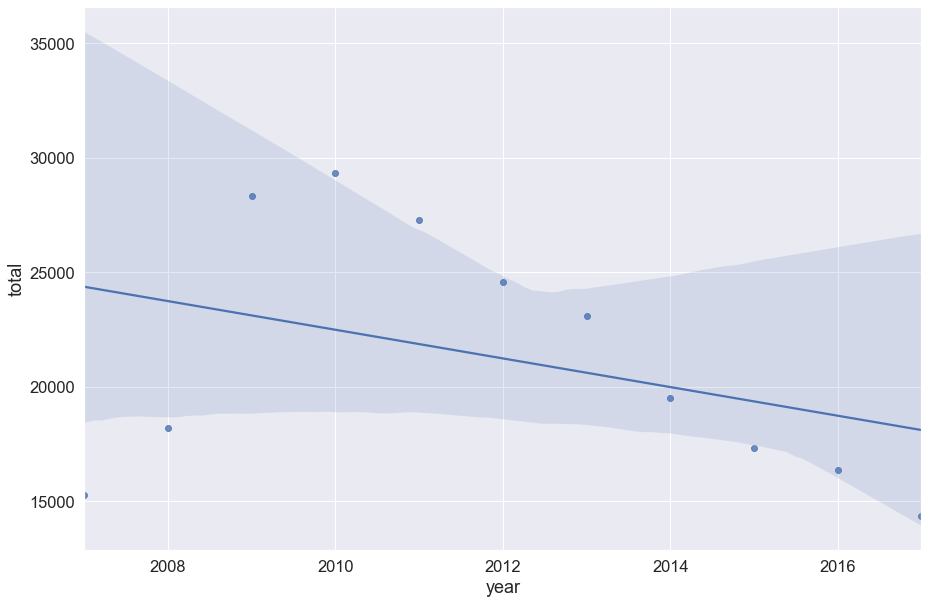

In [33]:
#When both are numerical variables
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot)

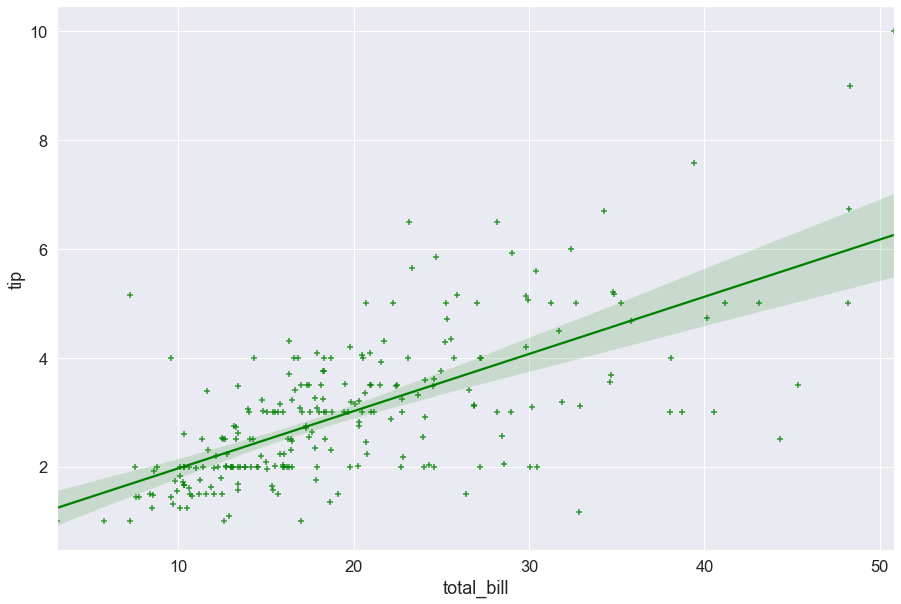

In [34]:
#chainging marker color and shape
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
ax = sns.regplot(x='total_bill', y='tip', data=tips_df, color='green', marker='+')

<Figure size 1080x720 with 0 Axes>

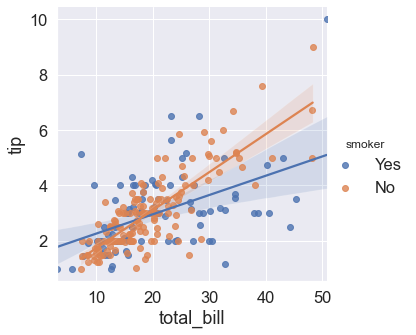

In [35]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
ax = sns.lmplot(x='total_bill', y='tip', data=tips_df, hue='smoker')

<Figure size 1080x720 with 0 Axes>

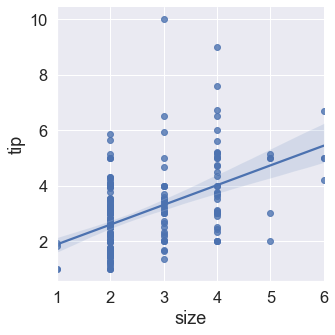

In [36]:
# When one of them is a categorical variable
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.lmplot(x="size", y="tip", data=tips_df)


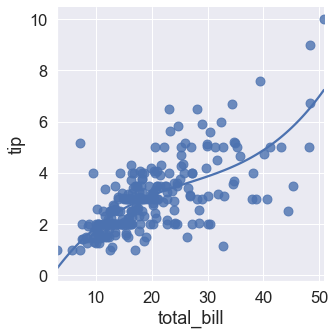

In [37]:
#Fitting a higher degree polinomial
sns.set(rc={'figure.figsize':(20,10)})

sns.set(font_scale=1.5)
sns.lmplot(x='total_bill', y='tip', data=tips_df,
           order=3, ci=None, scatter_kws={"s": 80})

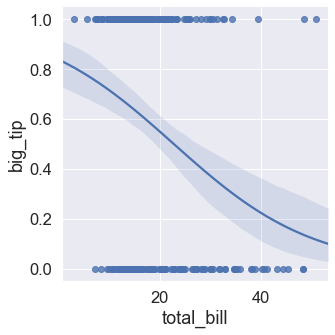

In [38]:
#Fitting a logit
tips_df["big_tip"] = (tips_df['tip'] / tips_df['total_bill']) > .15
g = sns.lmplot(x="total_bill", y="big_tip",data=tips_df, logistic=True, truncate=False)

## Facetting Plots

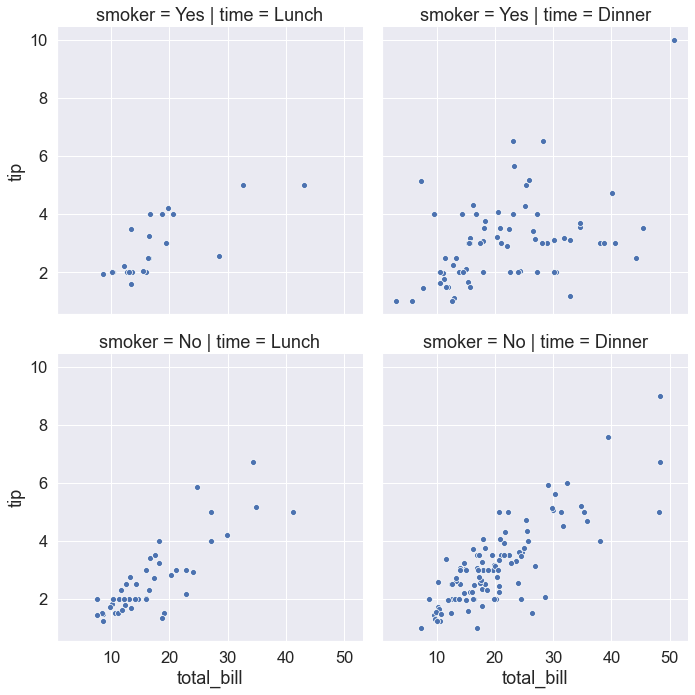

In [39]:
sns.relplot(x="total_bill", y="tip", row="smoker",
            col="time", data=tips_df);

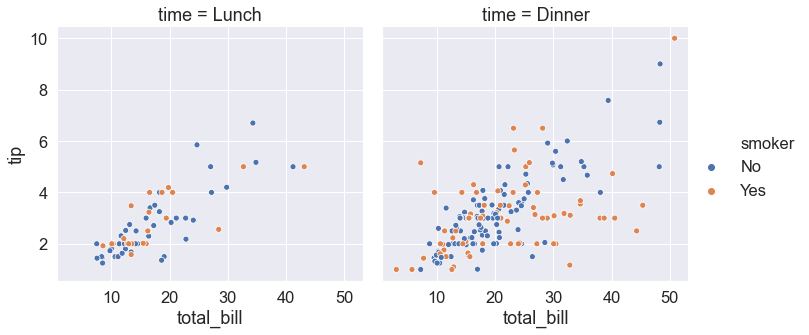

In [40]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips_df);

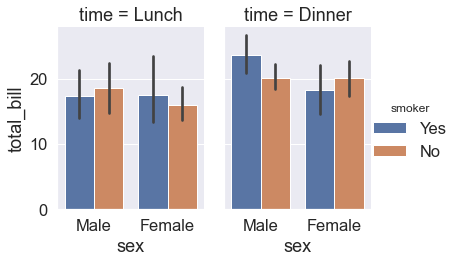

In [41]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips_df, kind="bar",
                height=4, aspect=.7)

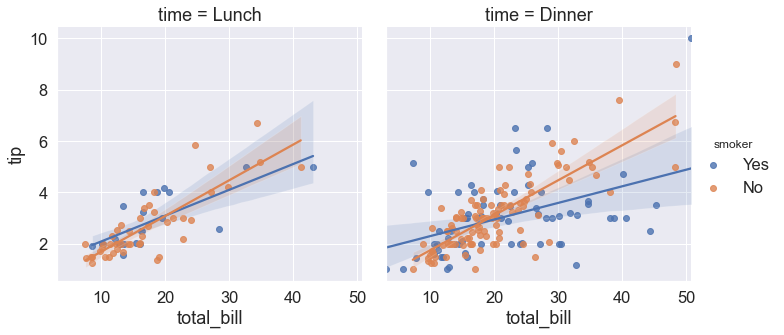

In [42]:
#Faceted Regression
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips_df);


C:\Users\mlxp\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\mlxp\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\mlxp\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\mlxp\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\mlxp\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\mlxp\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: Runt

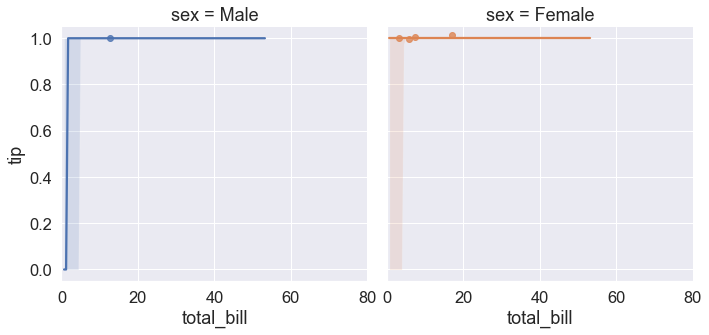

In [43]:
#Faceted Logit Regression
g = sns.lmplot(x="total_bill", y="tip", col="sex", hue="sex", data=tips_df, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))